In [18]:
import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt

In [19]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv',header=None)

In [22]:
train_data=train[train['observation']=='PM2.5']
test_data=test[test[1]=='PM2.5']

In [23]:
train_data.head()

,Date,stations,observation,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
9,2014/1/1,station,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13
27,2014/1/2,station,PM2.5,21,23,30,30,22,18,13,...,53,43,43,45,46,32,16,19,22,26
45,2014/1/3,station,PM2.5,19,25,27,20,16,14,15,...,32,36,34,45,40,41,23,29,23,37
63,2014/1/4,station,PM2.5,27,27,14,20,22,24,26,...,62,55,56,67,78,83,90,75,85,82
81,2014/1/5,station,PM2.5,80,80,76,81,75,66,70,...,64,73,57,57,53,70,70,60,68,66


In [24]:
train_data.shape

(240, 27)

In [28]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10
9,id_0,PM2.5,27,13,24,29,41,30,29,27,28
27,id_1,PM2.5,46,47,57,78,84,76,59,61,61
45,id_2,PM2.5,10,10,25,34,40,39,36,25,22
63,id_3,PM2.5,71,58,51,41,41,46,43,34,29
81,id_4,PM2.5,13,23,18,10,5,5,13,9,12


In [29]:
test_data.shape

(240, 11)

## obtain train data

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 9 to 4311
Data columns (total 27 columns):
Date           240 non-null object
stations       240 non-null object
observation    240 non-null object
0              240 non-null object
1              240 non-null object
2              240 non-null object
3              240 non-null object
4              240 non-null object
5              240 non-null object
6              240 non-null object
7              240 non-null object
8              240 non-null object
9              240 non-null object
10             240 non-null object
11             240 non-null object
12             240 non-null object
13             240 non-null object
14             240 non-null object
15             240 non-null object
16             240 non-null object
17             240 non-null object
18             240 non-null object
19             240 non-null object
20             240 non-null object
21             240 non-null object
22             240 

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 9 to 4311
Data columns (total 11 columns):
0     240 non-null object
1     240 non-null object
2     240 non-null object
3     240 non-null object
4     240 non-null object
5     240 non-null object
6     240 non-null object
7     240 non-null object
8     240 non-null object
9     240 non-null object
10    240 non-null object
dtypes: object(11)
memory usage: 22.5+ KB


In [34]:
for i in train_data.columns[3:]:
    train_data[i]=train_data[i].apply(float)

E:\Anaconda3\envs\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 9 to 4311
Data columns (total 27 columns):
Date           240 non-null object
stations       240 non-null object
observation    240 non-null object
0              240 non-null float64
1              240 non-null float64
2              240 non-null float64
3              240 non-null float64
4              240 non-null float64
5              240 non-null float64
6              240 non-null float64
7              240 non-null float64
8              240 non-null float64
9              240 non-null float64
10             240 non-null float64
11             240 non-null float64
12             240 non-null float64
13             240 non-null float64
14             240 non-null float64
15             240 non-null float64
16             240 non-null float64
17             240 non-null float64
18             240 non-null float64
19             240 non-null float64
20             240 non-null float64
21             240 non-null float

In [36]:
for i in test_data.columns[2:]:
    test_data[i]=test_data[i].apply(float)

E:\Anaconda3\envs\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 9 to 4311
Data columns (total 11 columns):
0     240 non-null object
1     240 non-null object
2     240 non-null float64
3     240 non-null float64
4     240 non-null float64
5     240 non-null float64
6     240 non-null float64
7     240 non-null float64
8     240 non-null float64
9     240 non-null float64
10    240 non-null float64
dtypes: float64(9), object(2)
memory usage: 22.5+ KB


In [46]:
train_array=train_data.values[:,3:]
test_array=test_data.values[:,2:]

In [57]:
X_train=[]
y_train=[]
for i in range(15):
    X_train.extend(train_array[:,i:i+9])
    y_train.extend(train_array[:,i+9])

In [78]:
X_train=np.array(X_train,dtype=np.float64)
y_train=np.array(y_train,dtype=np.float64)

In [79]:
X_train.shape,y_train.shape

((3600, 9), (3600,))

In [90]:
def costfunction(x,y,theta):
    m=np.size(y)
    J=1/(2*m)*sum((np.dot(x,theta)-y)**2)
    return J
def gradient_descent(x,y,theta,alpha,num_iter):
    costs=[]
    m=np.size(y)
    for i in range(num_iter): 
        grad=alpha/m*np.dot(x.T,(np.dot(x,theta)-y))
        theta=theta-grad
        cost=costfunction(X,y,theta)
        costs.append(cost)
    plt.figure()
    plt.plot(costs)
    return theta

In [81]:
mean=np.mean(X_train,axis=0)
std=np.std(X_train,axis=0)
X=(X_train-mean)/std

In [87]:
m,n=X.shape
X=np.c_[np.ones(m),X]
y=y_train.reshape(-1,1)

In [88]:
theta=np.zeros([10,1])
cost=costfunction(X,y,theta)
cost

array([438.05763889])

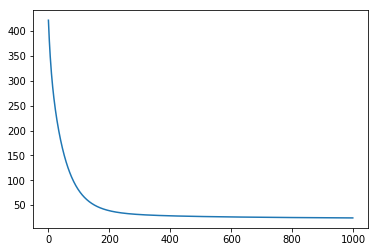

In [101]:
new_theta=gradient_descent(X,y,theta,alpha=0.01,num_iter=1000)

In [102]:
cost=costfunction(X,y,new_theta)
cost

array([24.24554763])

In [103]:
test_array=np.array(test_array,dtype=np.float64)
mean=np.mean(test_array,axis=0)
std=np.std(test_array,axis=0)
test_values=(test_array-mean)/std

In [104]:
test_values.shape

(240, 9)

In [105]:
m=test_values.shape[0]
test_values=np.c_[np.ones(m),test_values]
y_pred=np.dot(test_values,new_theta)

In [106]:
submit=pd.read_csv('sampleSubmission.csv')
submit['value']=y_pred
submit.to_csv('sampleSubmission.csv',index=False)